In [44]:
import os
import pandas as pd
import numpy as np

In [45]:
os.listdir('C://Users//CUONG NGUYEN//Jupiter NoteBook//Data Engineer//Project_Data_Analyst')

['.ipynb_checkpoints',
 'pandas_explorationdata_stackoverflow_survey.ipynb',
 'pandas_free-code-camp.ipynb',
 'README_2020.txt',
 'README_2021.txt',
 'Read_Data_From_File.ipynb',
 'result_product_amazon.csv',
 'Scraping News.ipynb',
 'Scraping_Amazon_Web.ipynb',
 'so_survey_2020.pdf',
 'stack-overflow-developer-survey-2020.zip',
 'stack-overflow-developer-survey-2021.zip',
 'survey_results_public.csv',
 'survey_results_schema.csv']

In [46]:
schema_fname = './data/survey_results_schema.csv'
public_fname = './datasurvey_results_public.csv'

In [47]:
schema_raw = pd.read_csv(schema_fname, index_col = 'Column').QuestionText
# chỉ chọn cột cần quan tâm
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [48]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

In [49]:
survey_raw_df = pd.read_csv(public_fname)
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [50]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [51]:
# copy data từ survey_raw_df sang survey_df với 20 columns of selected_columns
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns]

In [52]:
schema.shape

(20,)

In [53]:
survey_df.shape

(64461, 20)

In [54]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [55]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [56]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [57]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [58]:
# cast tring -> numeric, errors = 'coerce' trả về giá trị NaN nếu ko phải là số 
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [59]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


#### Ta thấy giá trị min, max Age, Age1stCode từ 1 - > 5 là không thể. Do người dùng nhập sai. Drop trường dữ liệu có giá trị sai

In [60]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 80].index, inplace=True)

survey_df.drop(survey_df[survey_df.Age1stCode < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age1stCode > 80].index, inplace=True)

#### Drop WorkWeekHrs > 140h (~20 hours per day) 

In [61]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [62]:
# Dataframe sau khi loại bỏ thông tin sai
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,41537.000000,52541.000000,51931.000000,40263.000000,37650.000000
mean,30.605068,16.182486,12.188134,8.542260,39.985377
std,9.347991,4.669182,9.141513,7.698519,10.657218
min,10.000000,10.000000,1.000000,1.000000,1.000000
25%,24.000000,13.000000,6.000000,3.000000,40.000000
50%,29.000000,16.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,16.000000,11.000000,43.000000
max,80.000000,76.000000,50.000000,50.000000,140.000000


In [64]:
survey_df['Gender'].value_counts()

Man                                                            42057
Woman                                                           3601
Non-binary, genderqueer, or gender non-conforming                318
Man;Non-binary, genderqueer, or gender non-conforming            100
Woman;Non-binary, genderqueer, or gender non-conforming           74
Woman;Man                                                         61
Woman;Man;Non-binary, genderqueer, or gender non-conforming       20
Name: Gender, dtype: int64

In [65]:
# xoá những giá trị gender ko phù hợp
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [66]:
survey_df['Gender'].value_counts()

Man                                                  42057
Woman                                                 3601
Non-binary, genderqueer, or gender non-conforming      318
Name: Gender, dtype: int64

In [67]:
# lấy ngẫu nhiên 10 giá trị
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
53929,India,NaN,NaN,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,16.0,NaN,NaN,C;C++,NaN,Once every few years,Watch help / tutorial videos,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Financial per...,NaN,NaN
22891,Norway,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,NaN,18.0,5.0,C#;Dart;HTML/CSS;JavaScript;Kotlin;PHP;SQL;Swi...,C#;Dart;HTML/CSS;JavaScript;Kotlin;Swift,Once a year,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
1695,United States,27.0,Man,"Professional degree (JD, MD, etc.)",Web development or web design,Yes,25.0,2.0,NaN,C#;HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, full-stack;Developer, game or graphics",NaN,NaN,Industry that I’d be working in;Office environ...,NaN,NaN
26639,Spain,43.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,18.0,22.0,17.0,HTML/CSS;Java;JavaScript;Scala,Java;JavaScript;Kotlin;Python;Scala,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack",42.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Very important
8606,Ukraine,31.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,16.0,12.0,JavaScript;Python,JavaScript;Python;Scala,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end",30.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Not at all important/not necessary
17856,Uruguay,21.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,9.0,1.0,Java;JavaScript;Kotlin,Haskell;JavaScript;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Developer, mobile",30.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Critically important
39566,Kenya,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
8798,India,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,17.0,5.0,2.0,HTML/CSS;JavaScript;PHP;SQL,JavaScript;PHP;Python;R;Ruby;SQL;TypeScript,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Slightly satisfied,NaN,NaN,Somewhat important
63380,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,13.0,4.0,3.0,C;C++;HTML/CSS;Java;JavaScript;PHP;SQL,Go;JavaScript;PHP;Python;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,NaN,NaN,NaN,Slightly satisfied,NaN,Often: 1-2 days per week or more,Somewhat important
3705,Brazil,40.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,19.0,21.0,20.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,NaN,Once every few years,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",60.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Fairly important


# Exploratory Analysis and Visualization

In [97]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

### Plot 10 countries with the highest number of responses?

In [98]:
schema.Country

'Where do you live?'

In [99]:
survey_df.Country.nunique()

183

In [100]:
# Identify countries ưith the highest number of respondent using value_counts()
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         10969
India                  8164
Germany                3546
United Kingdom         3357
Canada                 1977
France                 1759
Brazil                 1737
Netherlands            1216
Poland                 1160
Spain                  1085
Australia              1042
Italy                  1034
Russian Federation      987
Pakistan                793
Sweden                  787
Name: Country, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

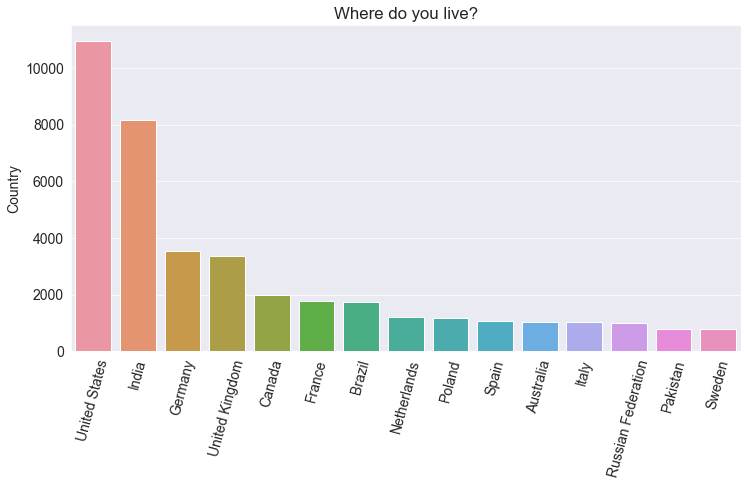

In [101]:
# Visualize using barchart
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries)

### Age

In [102]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

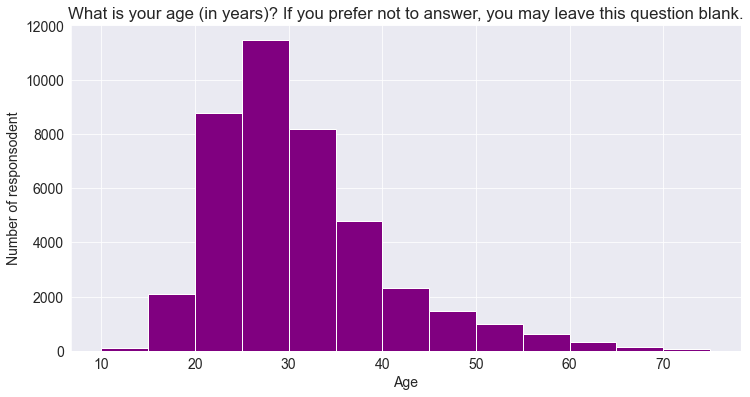

In [103]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of responsodent')

plt.hist(survey_df.Age, bins = np.arange(10, 80, 5), color='purple');

### Gender

In [104]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [106]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  42057
Woman                                                 3601
Non-binary, genderqueer, or gender non-conforming      318
Name: Gender, dtype: int64

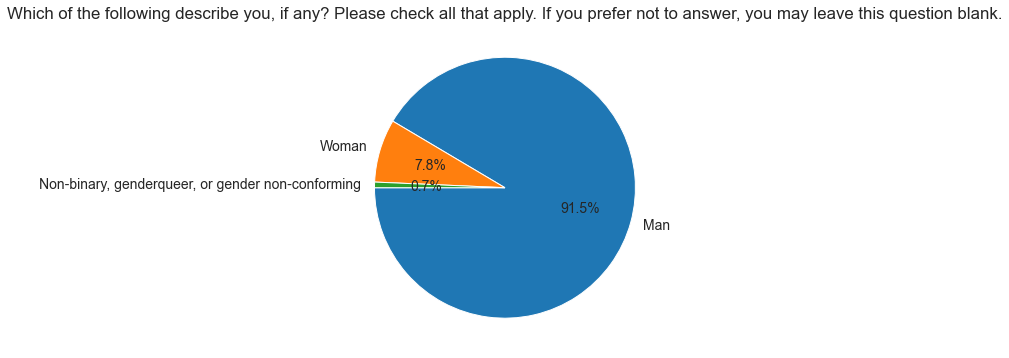

In [111]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);